In [298]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 

from scikitplot.metrics import plot_silhouette
from sklearn.metrics import silhouette_score

In [299]:
df = pd.read_csv("data/bank-additional.csv", delimiter=";")

In [300]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Odrediti tipove podataka atributa

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

## Deskriptivne statistike 

In [302]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


## Korelacije

C:\Users\vojislav\AppData\Local\Temp\ipykernel_21392\3702941559.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


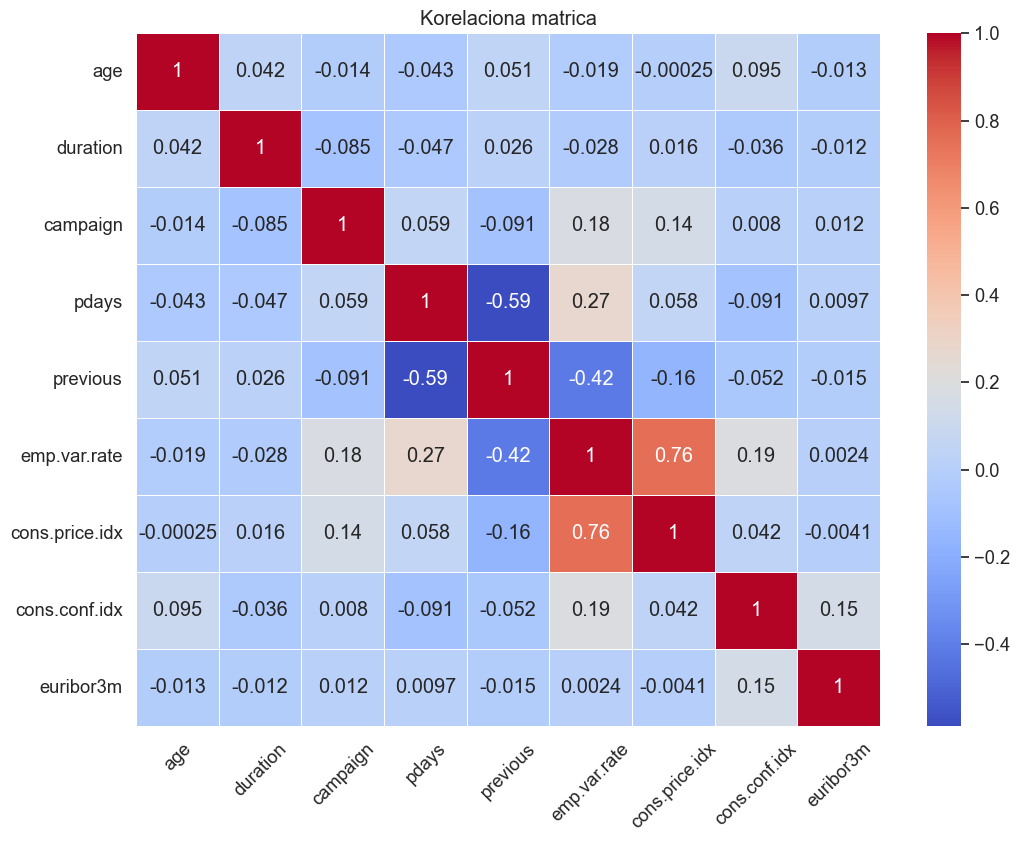

In [303]:
corr = df.corr() 

plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelaciona matrica')
plt.xticks(rotation=45)
plt.show()

## Raspodele vrednosti

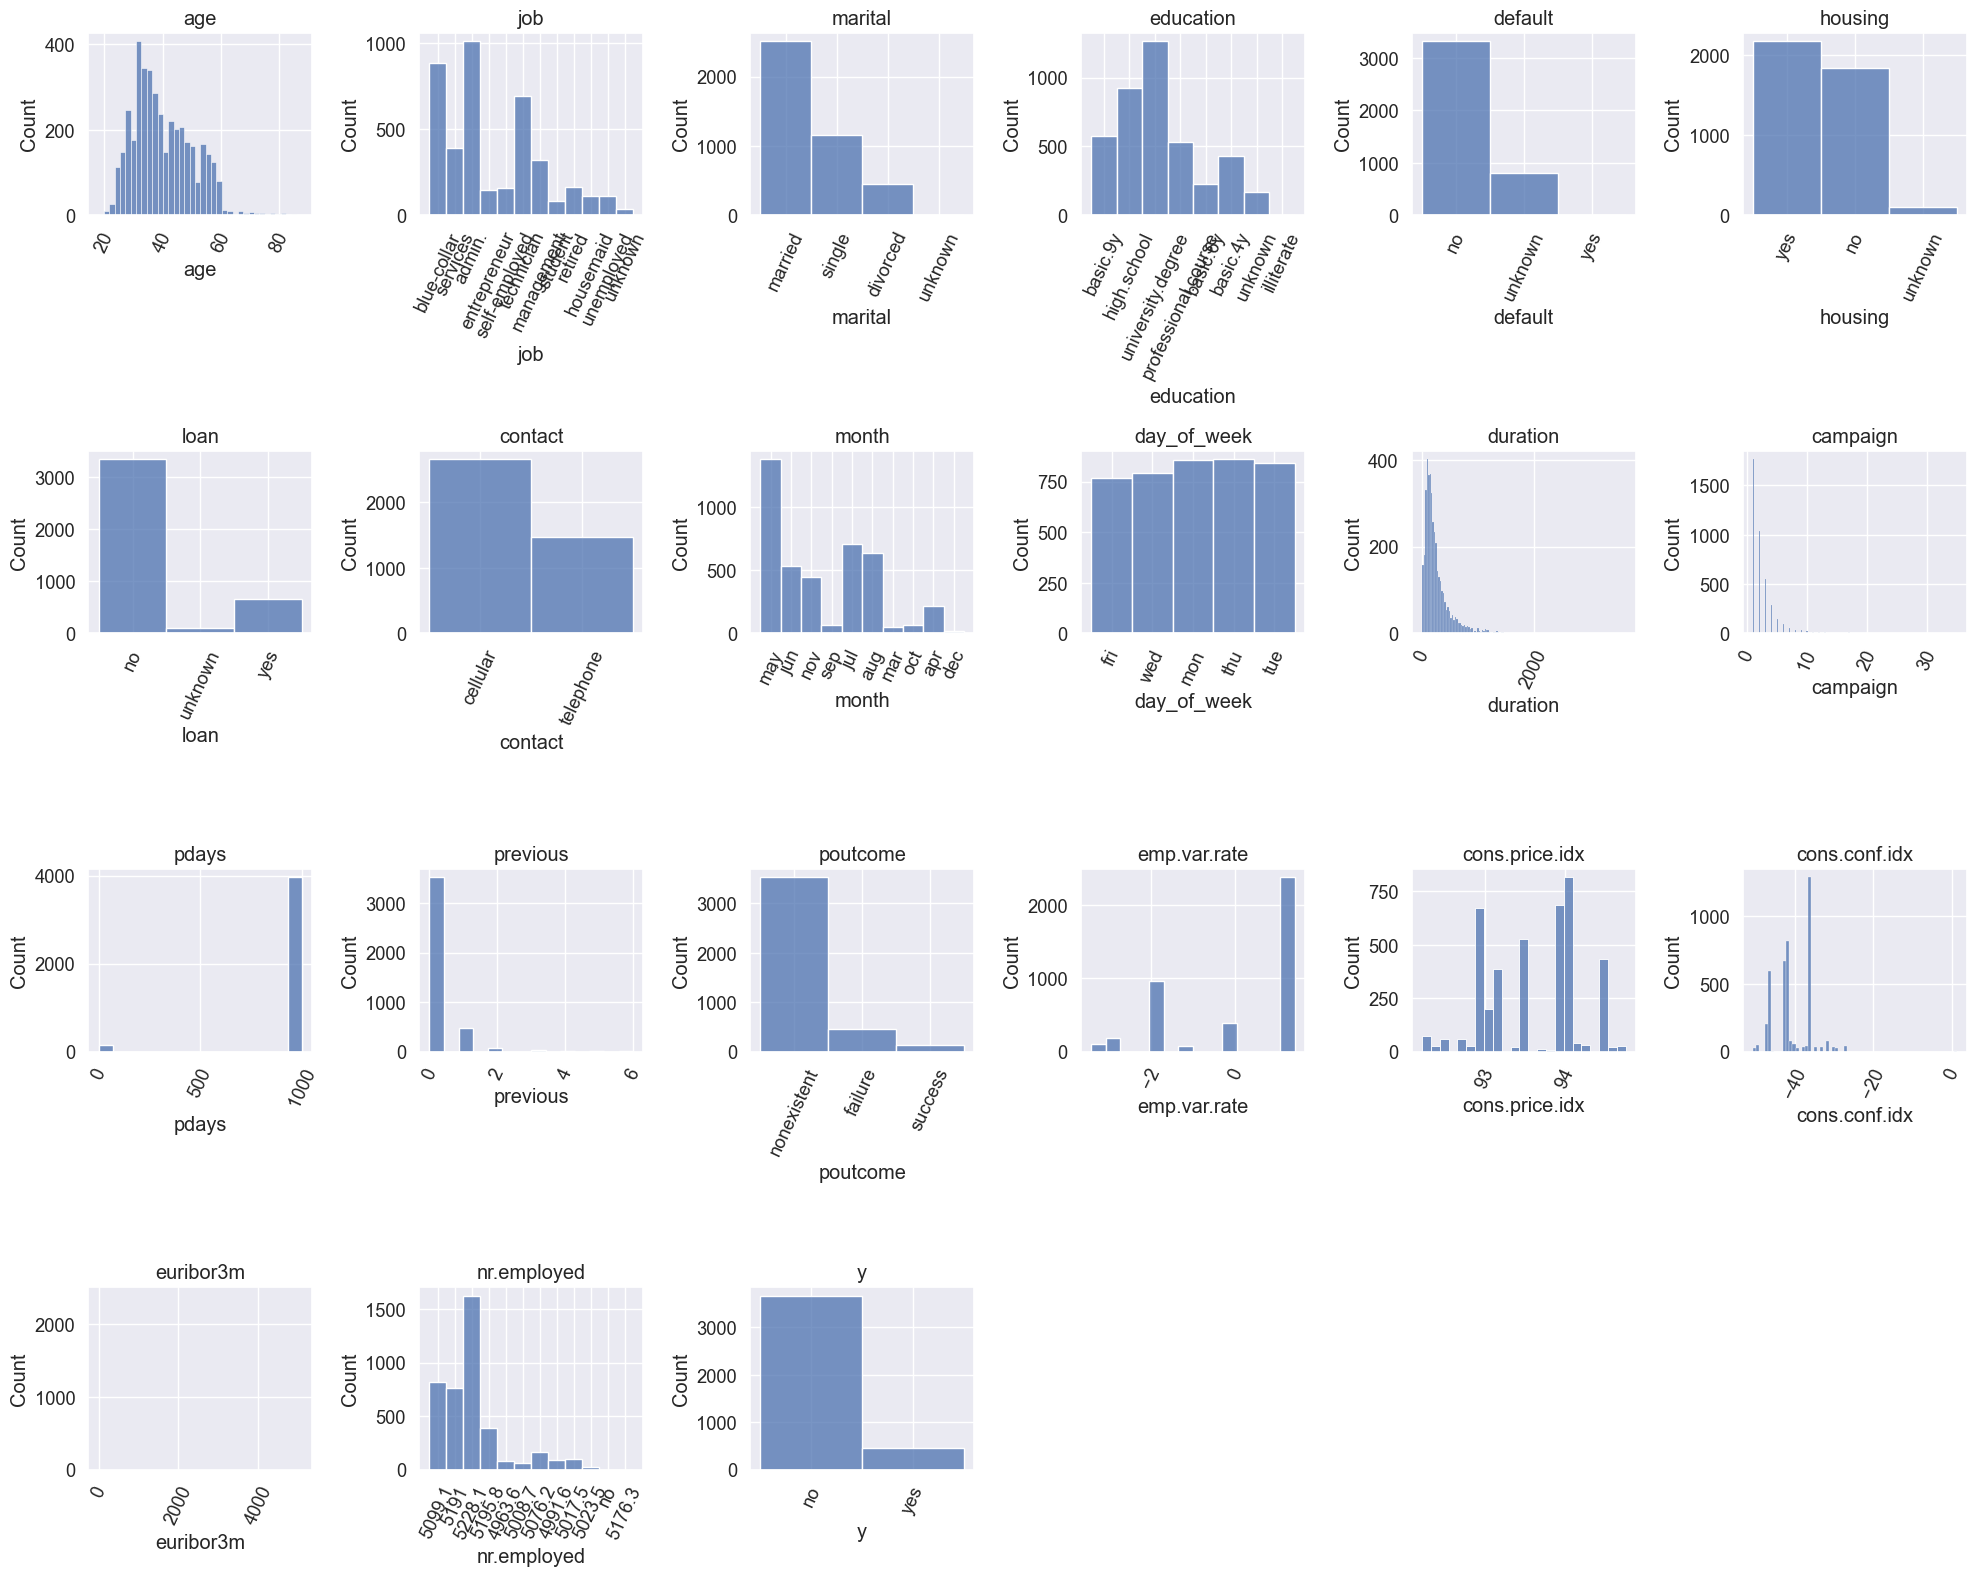

In [304]:
plt.figure(figsize=(20,16))
for i, column in enumerate(df.columns):
    if i >20:
        break
    plt.subplot(4,6, i+1)
    sns.histplot(df[column])
    plt.xticks(rotation=65)
    plt.title(column)
plt.tight_layout()
plt.show()

## Vizuelizacije 

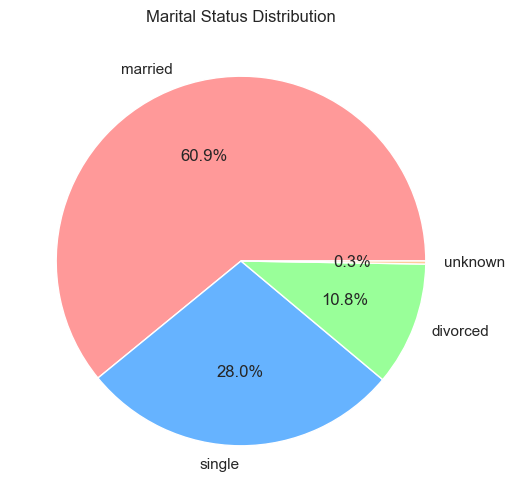

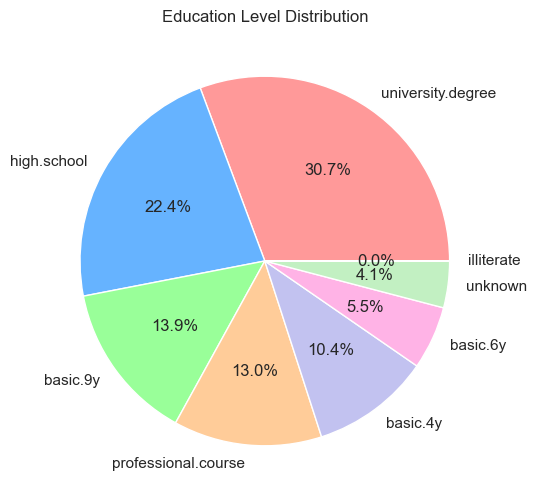

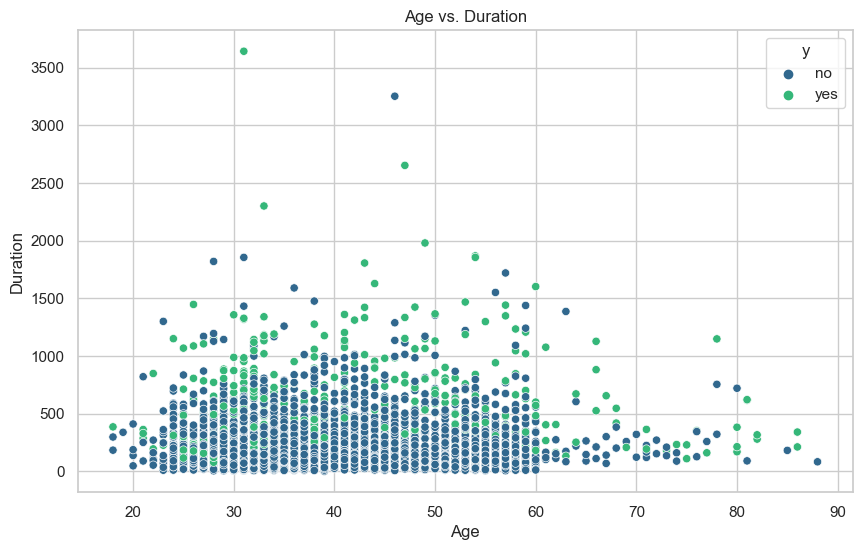

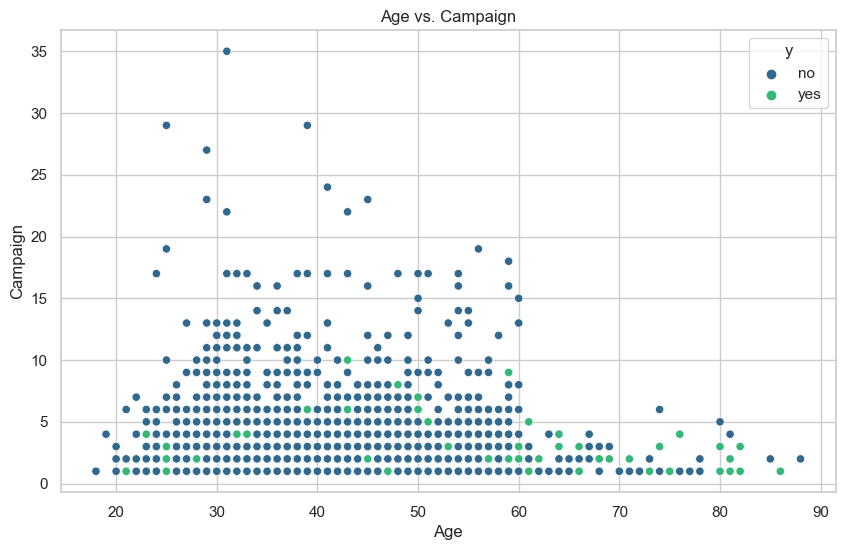

In [305]:

sns.set(style="whitegrid")

marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Marital Status Distribution')
plt.show()

education_counts = df['education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#c2d6d6'])
plt.title('Education Level Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration', hue='y', palette='viridis')
plt.title('Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='campaign', hue='y', palette='viridis')
plt.title('Age vs. Campaign')
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.show()


Vizuelizacije: 
- Histplot +
- Violin plot / boxplot
- Scatter plotovi +
- Pie chart  +

# Priprema podataka i null vrednosti

In [306]:
rows_with_null = df[df.isnull().any(axis=1)]

In [307]:
rows_with_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1.0,999,0.0,nonexistent,1.1,93.994,-36.400,4.855,5191,no
117,53,services,married,high.school,unknown,no,no,telephone,may,thu,...,NaN,999,0.0,nonexistent,1.1,93.994,-36.400,4.860,5191,no
149,40,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,...,1.0,999,0.0,nonexistent,1.4,93.444,-36.100,4.965,5228.1,no
181,42,entrepreneur,married,university.degree,no,yes,no,telephone,may,tue,...,1.0,999,0.0,nonexistent,NaN,93.994,-36.400,4.857,5191,no
212,32,technician,married,professional.course,no,no,no,cellular,jul,tue,...,1.0,999,0.0,nonexistent,1.4,NaN,-42.700,4.962,5228.1,no
245,45,blue-collar,divorced,basic.6y,unknown,yes,no,cellular,may,thu,...,1.0,999,0.0,nonexistent,-1.8,92.893,NaN,1.327,5099.1,no
279,23,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999,NaN,nonexistent,1.4,93.444,-36.100,4.964,5228.1,no
312,30,technician,married,university.degree,unknown,yes,no,telephone,may,wed,...,NaN,999,0.0,nonexistent,1.1,93.994,-36.400,4.858,5191,no
344,51,unknown,married,unknown,unknown,yes,no,cellular,aug,fri,...,5.0,999,0.0,nonexistent,1.4,93.444,-36.100,4.963,5228.1,no
375,31,technician,single,professional.course,no,unknown,unknown,cellular,aug,mon,...,NaN,999,0.0,nonexistent,1.4,93.444,-36.100,4.963,5228.1,no


In [308]:
print(df.iloc[780])

age                        32
job               blue-collar
marital               married
education            basic.4y
default                    no
housing                    no
loan                      yes
contact              cellular
month                     may
day_of_week               thu
duration                 80.0
campaign                  4.0
pdays                     999
previous                  0.0
poutcome          nonexistent
emp.var.rate             -1.8
cons.price.idx         92.893
cons.conf.idx           1.266
euribor3m              5099.1
nr.employed                no
y                         NaN
Name: 780, dtype: object


In [309]:
df.loc[780,'cons.conf.idx'] = None 
df.loc[780,'euribor3m'] = 1.266
df.loc[780,'nr.employed'] = 5099.1
df.loc[780,'y'] = 'no'

In [310]:
df['nr.employed'] = pd.to_numeric(df['nr.employed'])
print(df.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     3
euribor3m         2
nr.employed       1
y                 0
dtype: int64


In [311]:
df.fillna(df.mean(), inplace=True)

C:\Users\vojislav\AppData\Local\Temp\ipykernel_21392\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [312]:
unknown_counts = (df == 'unknown').sum()
print(unknown_counts)

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64


In [313]:
df[['job','marital','education','housing','loan']] = df[['job','marital','education','housing','loan']].replace('unknown', pd.np.nan)

C:\Users\vojislav\AppData\Local\Temp\ipykernel_21392\980616855.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df[['job','marital','education','housing','loan']] = df[['job','marital','education','housing','loan']].replace('unknown', pd.np.nan)


In [314]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [316]:
df.to_csv('pripremljeni_podaci.csv', index=False)             
df['y'] = df['y'].map({'yes':1, 'no':0})
df = pd.get_dummies(df)

In [317]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [318]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [319]:
df['total_contacts'] = df['campaign'] + df['previous']

# Klasifikacija 

In [320]:
X = df.drop(columns =['y', 'duration'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

- Decision tree
- Random forest
- k-NN

In [321]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Trening i test funkcija 

In [322]:
def train_test_models(X_train, y_train, X_test, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred) 
    print("KNN accuracy: ", knn_accuracy)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=27)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print("Random forest accuracy: ", rf_accuracy)

    tree_model = DecisionTreeClassifier(random_state=27)
    tree_model.fit(X_train, y_train)
    tree_pred = tree_model.predict(X_test)
    tree_accuracy = accuracy_score(y_test, tree_pred)
    print("Decision tree accuracy: ", tree_accuracy)
    knn_conf_matrix = confusion_matrix(y_test, knn_pred)
    knn_precision = precision_score(y_test, knn_pred)
    knn_recall = recall_score(y_test, knn_pred)
    knn_f1 = f1_score(y_test, knn_pred)

    print("\nK-Nearest Neighbors Confusion Matrix:")
    print(knn_conf_matrix)
    print("\nK-Nearest Neighbors Precision:", knn_precision)
    print("K-Nearest Neighbors Recall:", knn_recall)
    print("K-Nearest Neighbors F1 Score:", knn_f1)


    rf_conf_matrix = confusion_matrix(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred)
    rf_recall = recall_score(y_test, rf_pred)
    rf_f1 = f1_score(y_test, rf_pred)

    print("\nRandom Forest Confusion Matrix:")
    print(rf_conf_matrix)
    print("\nRandom Forest Precision:", rf_precision)
    print("Random Forest Recall:", rf_recall)
    print("Random Forest F1 Score:", rf_f1)

    dt_conf_matrix = confusion_matrix(y_test, tree_pred)
    dt_precision = precision_score(y_test, tree_pred)
    dt_recall = recall_score(y_test, tree_pred)
    dt_f1 = f1_score(y_test, tree_pred)

    print("\nDecision Trees Confusion Matrix:")
    print(dt_conf_matrix)
    print("\nDecision Trees Precision:", dt_precision)
    print("Decision Trees Recall:", dt_recall)
    print("Decision Trees F1 Score:", dt_f1)


In [323]:
train_test_models(X_train, y_train, X_train, y_train)

KNN accuracy:  0.9139784946236559
Random forest accuracy:  1.0
Decision tree accuracy:  1.0

K-Nearest Neighbors Confusion Matrix:
[[2511   39]
 [ 209  124]]

K-Nearest Neighbors Precision: 0.7607361963190185
K-Nearest Neighbors Recall: 0.37237237237237236
K-Nearest Neighbors F1 Score: 0.5

Random Forest Confusion Matrix:
[[2550    0]
 [   0  333]]

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0

Decision Trees Confusion Matrix:
[[2550    0]
 [   0  333]]

Decision Trees Precision: 1.0
Decision Trees Recall: 1.0
Decision Trees F1 Score: 1.0


In [324]:
train_test_models(X_train, y_train, X_test, y_test)

KNN accuracy:  0.8923948220064725
Random forest accuracy:  0.9053398058252428
Decision tree accuracy:  0.8543689320388349

K-Nearest Neighbors Confusion Matrix:
[[1076   42]
 [  91   27]]

K-Nearest Neighbors Precision: 0.391304347826087
K-Nearest Neighbors Recall: 0.2288135593220339
K-Nearest Neighbors F1 Score: 0.2887700534759358

Random Forest Confusion Matrix:
[[1093   25]
 [  92   26]]

Random Forest Precision: 0.5098039215686274
Random Forest Recall: 0.22033898305084745
Random Forest F1 Score: 0.3076923076923077

Decision Trees Confusion Matrix:
[[1022   96]
 [  84   34]]

Decision Trees Precision: 0.26153846153846155
Decision Trees Recall: 0.288135593220339
Decision Trees F1 Score: 0.27419354838709675


### Unakrsna validacija

In [325]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=27)

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=27),
    "Decision Trees": DecisionTreeClassifier(random_state=27)
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
    print(f"{model_name} Cross-Validation f1: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

K-Nearest Neighbors Cross-Validation f1: 0.3281 (± 0.0473)
Random Forest Cross-Validation f1: 0.3177 (± 0.0199)
Decision Trees Cross-Validation f1: 0.2890 (± 0.0256)


### Optimizacija hiperparametara

In [326]:
params = {
    "K-Nearest Neighbors": {
        'n_neighbors': range(1, 21)
    },
    "Random Forest": {
        'n_estimators': list(range(1,100)),
        'max_depth': list(range(1,100)),
        'min_samples_split': list(range(1,20)), 
        'min_samples_leaf':list(range(1,20))
    },
    "Decision Trees": {
        'max_depth': list(range(1,200)),
        'min_samples_split': list(range(1,20)),
        'min_samples_leaf':list(range(1,20)),
        'max_features':list(range(10,50))
    }
}


best_estimators = {}
for model_name, model in models.items():
    print(f"Optimizing hyperparameters for {model_name}...")
    rand_search = RandomizedSearchCV(model, params[model_name], n_iter=20, cv=kf, scoring='f1', random_state=27)
    rand_search.fit(X, y)
    best_estimators[model_name] = rand_search.best_estimator_
    print(f"Best parameters for {model_name}: {rand_search.best_params_}")


for model_name, model in best_estimators.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
    print(f"{model_name} Cross-Validation f1: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

Optimizing hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 5}
Optimizing hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 64, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 72}
Optimizing hyperparameters for Decision Trees...
Best parameters for Decision Trees: {'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 22, 'max_depth': 45}
K-Nearest Neighbors Cross-Validation f1: 0.3281 (± 0.0473)
Random Forest Cross-Validation f1: 0.3284 (± 0.0376)
Decision Trees Cross-Validation f1: 0.3427 (± 0.0657)


In [327]:
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels', fontsize=14)
    plt.ylabel('True labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

## Promena granice odlucivanja


Evaluacija modela pre promene granice odlučivanja:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1118
           1       0.47      0.29      0.36       118

    accuracy                           0.90      1236
   macro avg       0.70      0.63      0.65      1236
weighted avg       0.88      0.90      0.89      1236



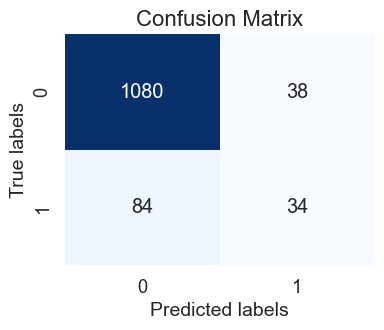


Evaluacija modela posle promene granice odlučivanja:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1118
           1       0.47      0.35      0.40       118

    accuracy                           0.90      1236
   macro avg       0.70      0.65      0.67      1236
weighted avg       0.89      0.90      0.89      1236



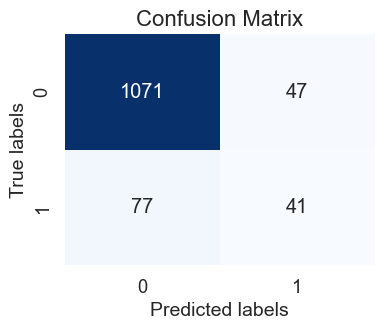

In [328]:
dt_model = DecisionTreeClassifier(min_samples_split= 1, min_samples_leaf = 17,max_features = 41, max_depth = 98, random_state=27)
dt_model.fit(X_train, y_train)

print("\nEvaluacija modela pre promene granice odlučivanja:")
print("--------------------------------------------------")
y_pred_before = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_before))

cm = confusion_matrix(y_test, y_pred_before)
plot_confusion_matrix(cm, [0,1])

y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
y_pred_after = (y_pred_prob >= 0.4).astype(int)

print("\nEvaluacija modela posle promene granice odlučivanja:")
print("--------------------------------------------------")
print(classification_report(y_test, y_pred_after))

cm = confusion_matrix(y_test, y_pred_after)

plot_confusion_matrix(cm, [0,1])

Evaluacija modela pre promene granice odlučivanja:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1118
           1       0.54      0.26      0.35       118

    accuracy                           0.91      1236
   macro avg       0.74      0.62      0.65      1236
weighted avg       0.89      0.91      0.89      1236



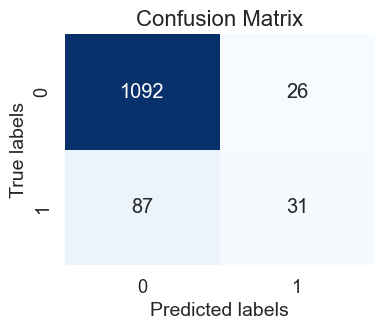


Evaluacija modela posle promene granice odlučivanja:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1118
           1       0.41      0.43      0.42       118

    accuracy                           0.89      1236
   macro avg       0.68      0.68      0.68      1236
weighted avg       0.89      0.89      0.89      1236



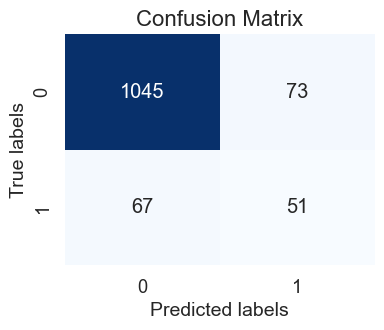

In [329]:
rf_model = RandomForestClassifier(n_estimators = 6, min_samples_split= 4, min_samples_leaf= 3, max_depth= 75, random_state=27)
rf_model.fit(X_train, y_train)

print("Evaluacija modela pre promene granice odlučivanja:")
print("------------------------------------------------")
y_pred_before = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_before))

cm = confusion_matrix(y_test, y_pred_before)
plot_confusion_matrix(cm, [0,1])

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
y_pred_after = (y_pred_prob >= 0.3).astype(int)

print("\nEvaluacija modela posle promene granice odlučivanja:")
print("--------------------------------------------------")
print(classification_report(y_test, y_pred_after))

cm = confusion_matrix(y_test, y_pred_after)
plot_confusion_matrix(cm, [0,1])

Evaluacija modela pre promene granice odlučivanja:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1118
           1       0.52      0.23      0.32       118

    accuracy                           0.91      1236
   macro avg       0.72      0.60      0.63      1236
weighted avg       0.88      0.91      0.89      1236



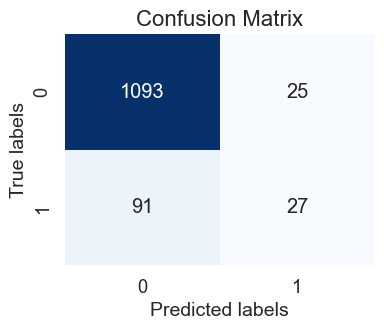


Evaluacija modela posle promene granice odlučivanja:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1118
           1       0.43      0.31      0.36       118

    accuracy                           0.89      1236
   macro avg       0.68      0.63      0.65      1236
weighted avg       0.88      0.89      0.89      1236



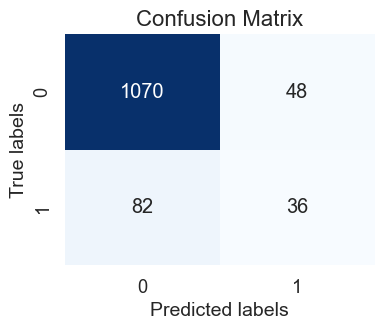

In [330]:
knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(X_train, y_train)

print("Evaluacija modela pre promene granice odlučivanja:")
print("------------------------------------------------")
y_pred_before = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_before))

cm = confusion_matrix(y_test, y_pred_before)
plot_confusion_matrix(cm, [0,1])

y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
y_pred_after = (y_pred_prob >= 0.4).astype(int)

print("\nEvaluacija modela posle promene granice odlučivanja:")
print("--------------------------------------------------")
print(classification_report(y_test, y_pred_after))

cm = confusion_matrix(y_test, y_pred_after)
plot_confusion_matrix(cm, [0,1])

# Klasterovanje

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   duration                       4119 non-null   float64
 2   campaign                       4119 non-null   float64
 3   pdays                          4119 non-null   int64  
 4   previous                       4119 non-null   float64
 5   emp.var.rate                   4119 non-null   float64
 6   cons.price.idx                 4119 non-null   float64
 7   cons.conf.idx                  4119 non-null   float64
 8   euribor3m                      4119 non-null   float64
 9   nr.employed                    4119 non-null   float64
 10  y                              4119 non-null   int64  
 11  job_admin.                     4119 non-null   uint8  
 12  job_blue-collar                4119 non-null   u

## Identifikacija autlajera

In [332]:
df = pd.read_csv('pripremljeni_podaci.csv')

outliers = {}
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number): 
        std = np.std(df[column])
        mean = np.mean(df[column])
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
        outliers[column] = outlier_count
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("\nOccurrences of outliers in each column:")
print(pd.Series(outliers))


Occurrences of outliers in each column:
age                32
duration           86
campaign           87
pdays             148
previous           49
emp.var.rate        0
cons.price.idx      0
cons.conf.idx      32
euribor3m           0
nr.employed        40
dtype: int64


In [333]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3645.000000,3645.000000,3645.000000,3645.0,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,39.740466,233.209220,2.305534,999.0,0.099144,0.236699,93.583119,-40.689435,3.813871,5177.720759
std,9.539428,187.861094,1.735388,0.0,0.298755,1.480206,0.549084,4.212211,1.624848,61.274118
min,18.000000,0.000000,1.000000,999.0,0.000000,-3.400000,92.201000,-50.000000,0.635000,4991.600000
25%,32.000000,102.000000,1.000000,999.0,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,176.000000,2.000000,999.0,0.000000,1.100000,93.444000,-41.800000,4.857000,5195.800000
75%,47.000000,302.000000,3.000000,999.0,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,71.000000,1014.000000,10.000000,999.0,1.000000,1.400000,94.465000,-29.800000,4.970000,5228.100000


In [334]:
df['duration'].nlargest(20)

2029    1014.0
576     1013.0
4037    1012.0
3139    1011.0
3097    1009.0
1495    1005.0
2632    1002.0
979      999.0
1160     997.0
3795     996.0
2412     992.0
471      988.0
134      984.0
2303     984.0
2529     984.0
2797     984.0
3944     980.0
1228     979.0
402      958.0
486      955.0
Name: duration, dtype: float64

## Normalizacija atributa

In [335]:

df = pd.get_dummies(df.drop(columns=['y']))

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)



In [336]:
kmeans = KMeans(n_clusters=4, random_state=27)

clusters =  kmeans.fit(df_normalized).labels_

df['clusters'] = clusters

c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [337]:
df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,clusters
0,30,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,1
1,39,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,2
3,38,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,2
4,47,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,3


In [338]:
df['clusters'].value_counts()

3    1302
1    1002
2     676
0     665
Name: clusters, dtype: int64

In [339]:

scores  = silhouette_score(df_normalized, clusters)

In [340]:
print(scores)

0.08763135046447565


<AxesSubplot: title={'center': 'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

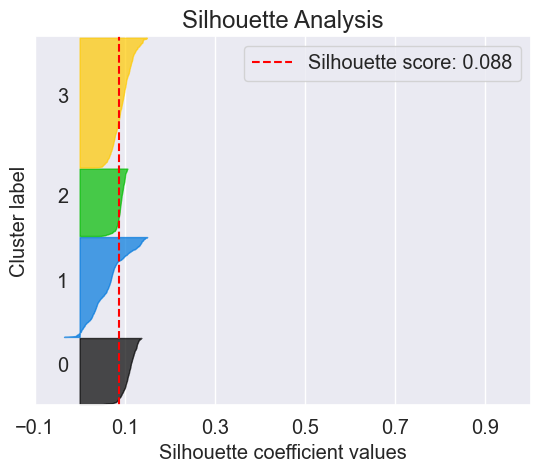

In [341]:

plot_silhouette(df_normalized, clusters)

## Analiza glavnih komponenti radi vizuelizacije

In [342]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_normalized)

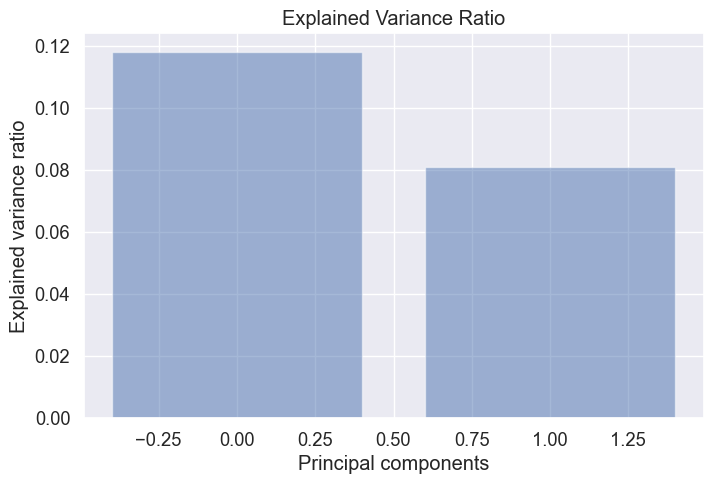

In [343]:
explained_variance = pca.explained_variance_ratio_ 
components = pca.components_ 

plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio')
plt.show()

Text(0.5, 1.0, 'PCA clusters')

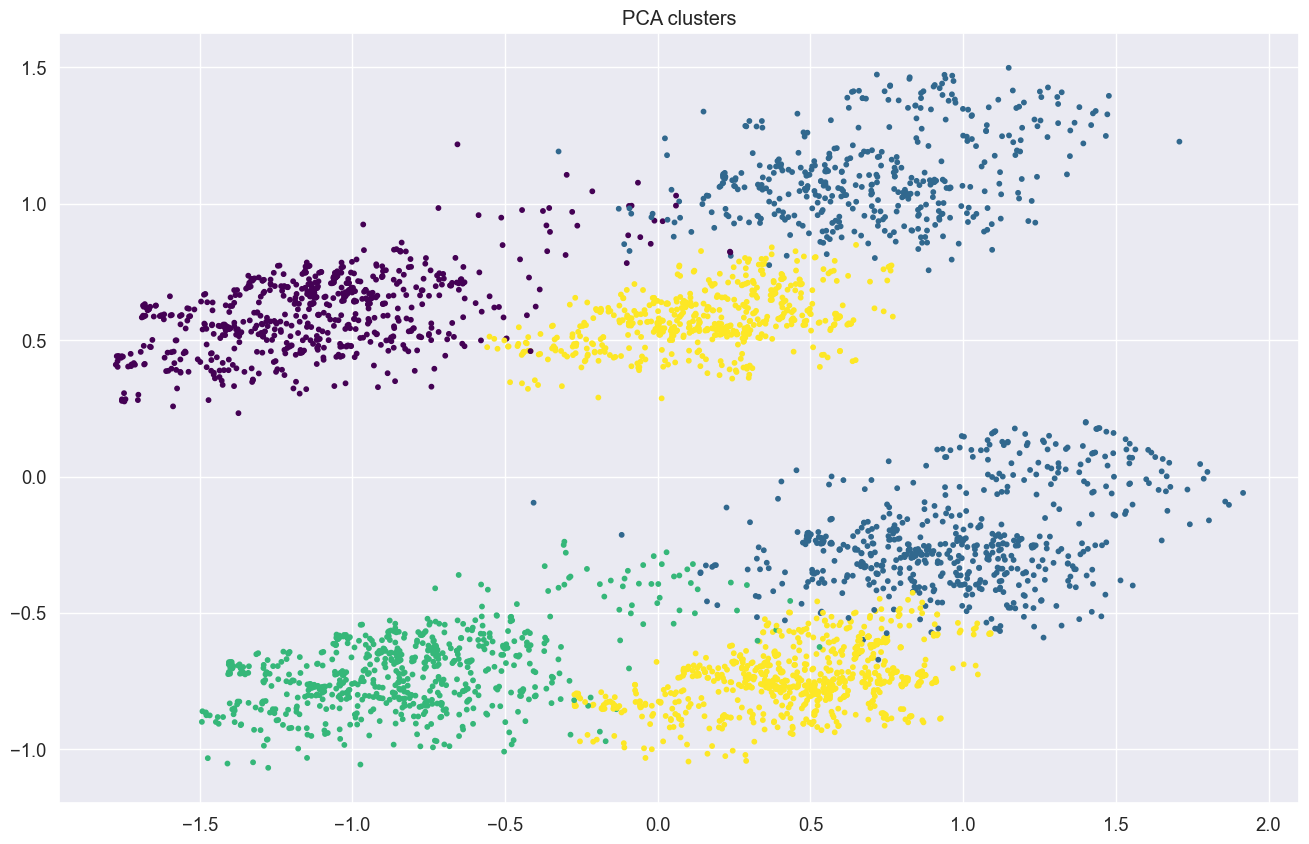

In [344]:
plt.figure(figsize=(16,10))
plt.scatter(X_pca[:, 0], X_pca[:,1], c = clusters, s=10, cmap='viridis')
plt.title("PCA clusters")

## t-SNE radi vizuelizacije

In [345]:
tsne = TSNE(n_components=2, perplexity=30, random_state=27)
X_tsne = tsne.fit_transform(df_normalized)

Text(0.5, 1.0, 't-SNE')

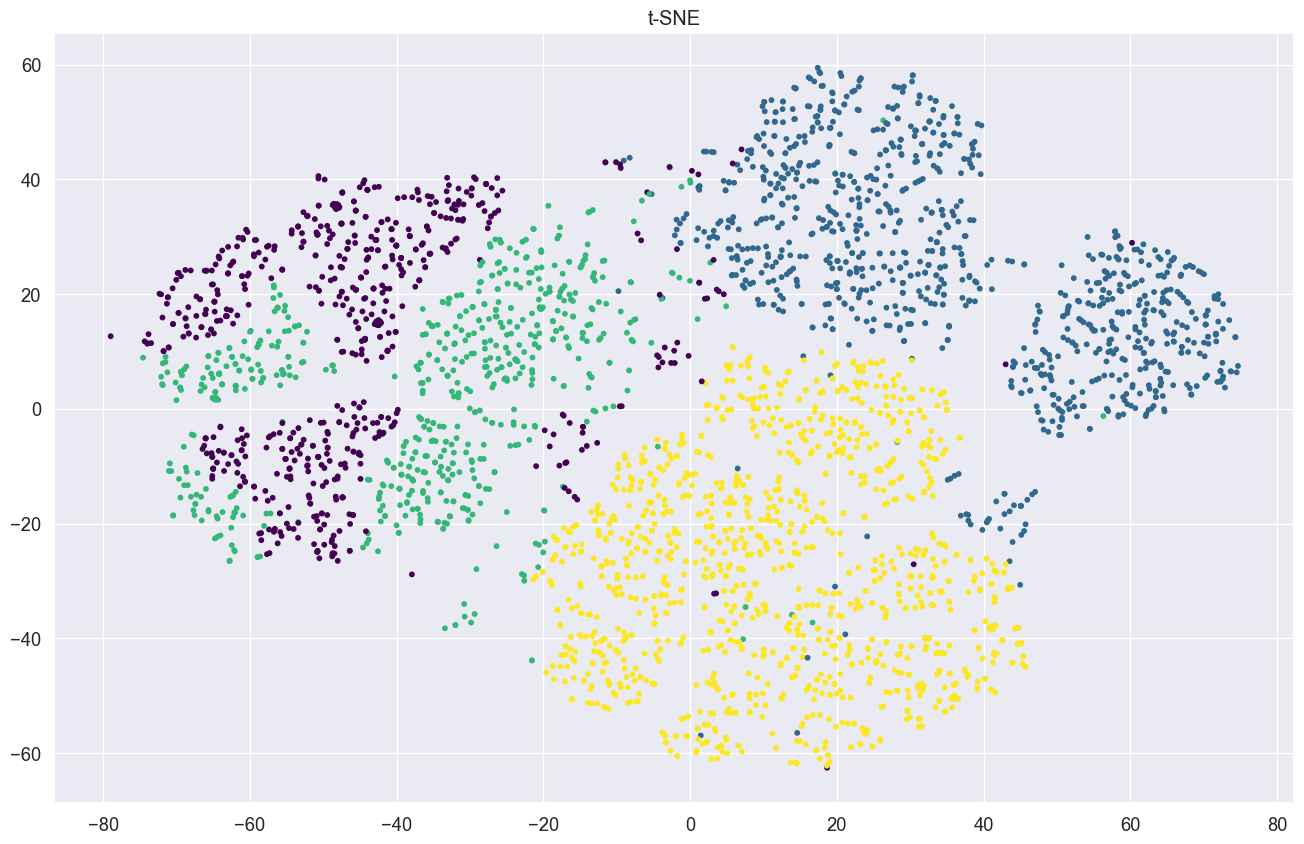

In [346]:
plt.figure(figsize=(16,10))
plt.scatter(X_tsne[:, 0], X_tsne[:,1], c = clusters, s=10, cmap='viridis')
plt.title("t-SNE")

In [347]:
df_vis = df.drop(columns=['clusters'],axis=1)

In [348]:
centroids = kmeans.cluster_centers_ 
centroids.shape

(4, 57)

In [349]:
centroids_df = pd.DataFrame(centroids, columns = df_vis.columns)

## Plot za osobine klastera u odnosu na atribute

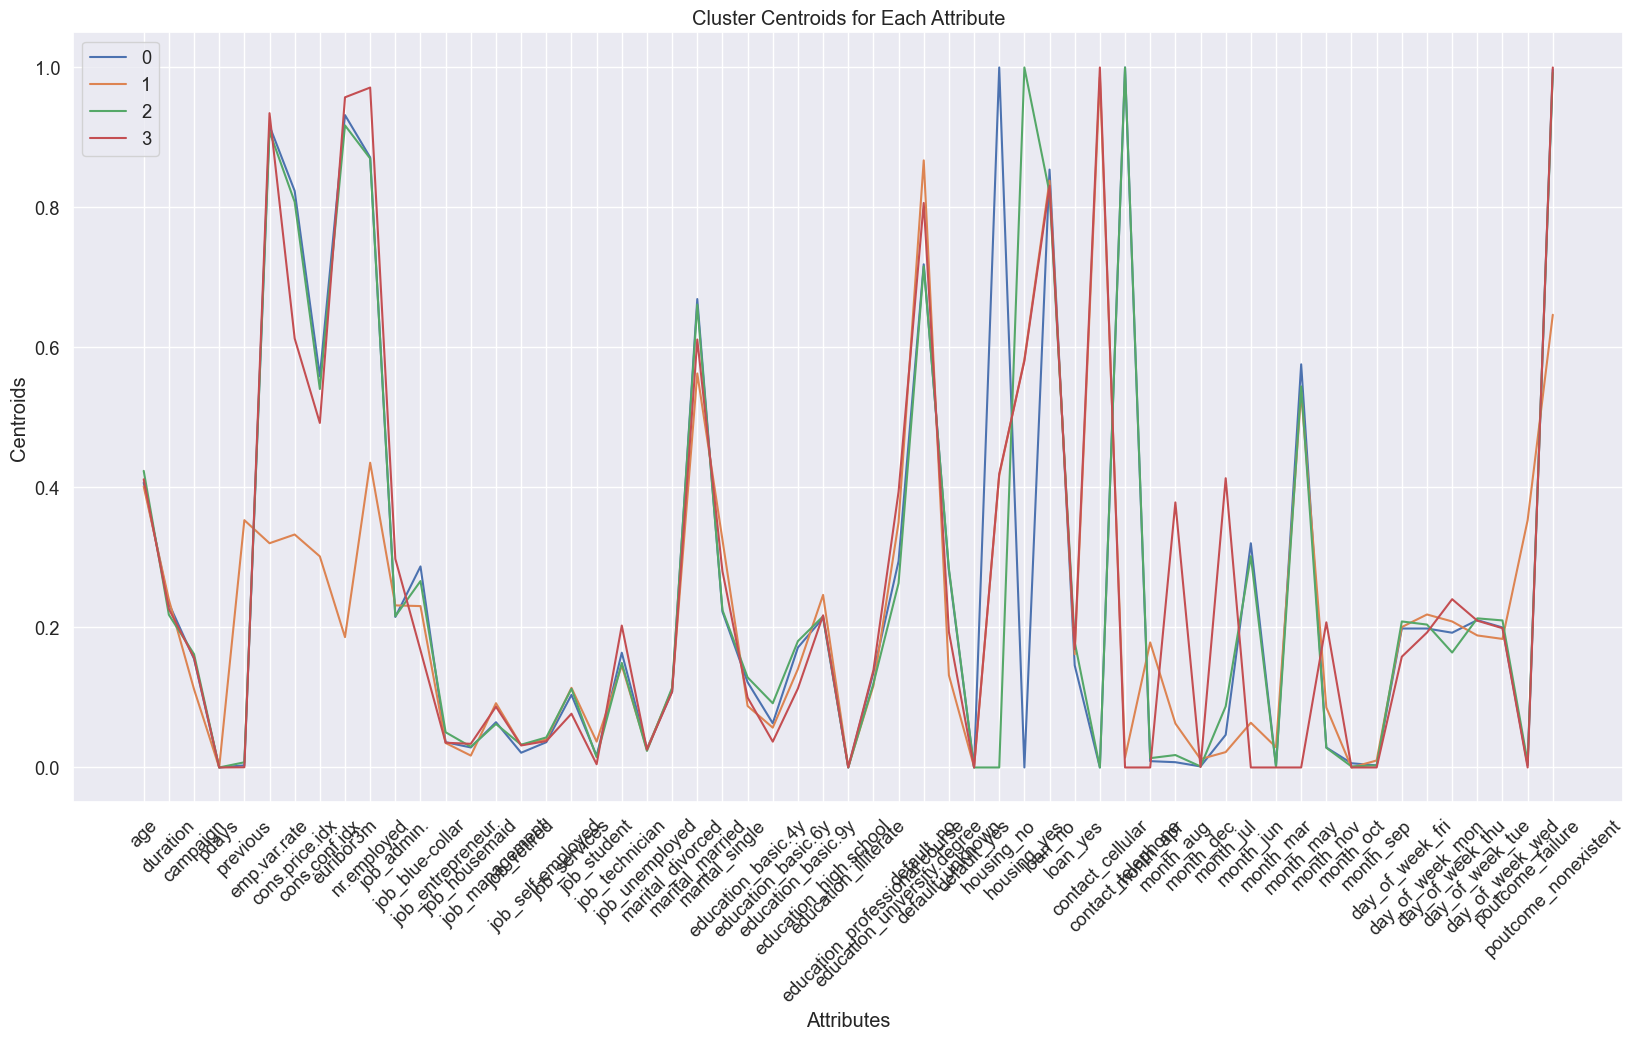

In [350]:
plt.figure(figsize=(20,10))
plt.plot(centroids_df.T)
plt.xticks(range(57), df_vis.columns, rotation=45)
plt.title('Cluster Centroids for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Centroids')
plt.legend(centroids_df.index)
plt.show()

In [351]:
centroids_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent
0,0.406781,0.234171,0.155233,0.0,0.003008,0.916541,0.823559,0.558788,0.931965,0.871525,...,0.028571,6.015038e-03,0.003008,0.198496,0.198496,0.192481,0.210526,0.200000,3.007519e-03,0.996992
1,0.401405,0.239774,0.111776,0.0,0.353293,0.320338,0.332803,0.301551,0.186191,0.435350,...,0.085828,-8.673617e-19,0.009980,0.200599,0.218563,0.208583,0.188623,0.183633,3.532934e-01,0.646707
2,0.423719,0.218119,0.161911,0.0,0.007396,0.908464,0.807888,0.540680,0.917252,0.869988,...,0.028107,1.479290e-03,0.002959,0.208580,0.204142,0.164201,0.213018,0.210059,7.396450e-03,0.992604
3,0.411689,0.226486,0.156728,0.0,0.000293,0.934729,0.612842,0.492167,0.957380,0.971310,...,0.207373,-1.951564e-18,0.000000,0.158218,0.192780,0.240399,0.209677,0.198925,6.938894e-17,1.000000


c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

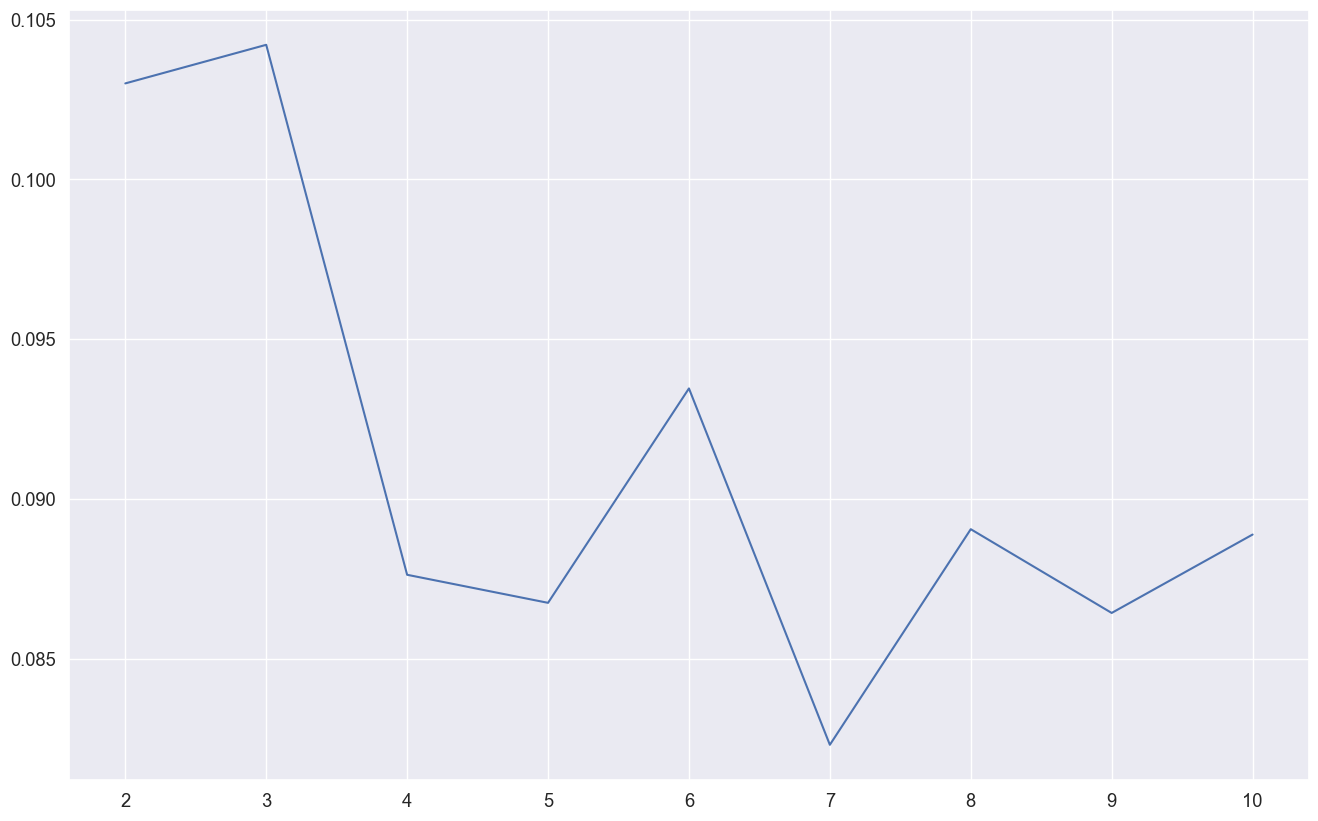

In [352]:
silhouette_scores = []
for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=27)
    kmeans.fit(df_normalized)
    cluster_labels = kmeans.labels_ 
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg) 

plt.figure(figsize=(16,10))
plt.plot(range(2,11), silhouette_scores)
plt.grid(True)
plt.show()

In [353]:
clusters = clusters.reshape(-1,1)

In [354]:
df_normalized1 = np.hstack((df_normalized, clusters))

In [355]:
df = pd.read_csv('pripremljeni_podaci.csv')

outliers = {}
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number): 
        std = np.std(df[column])
        mean = np.mean(df[column])
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
        outliers[column] = outlier_count
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
df['y'] = df['y'].map({'yes':1, 'no':0})
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(df_normalized1, y, test_size=0.2, random_state=27)

train_test_models(X_train, y_train, X_test, y_test)

KNN accuracy:  0.9396433470507545
Random forest accuracy:  0.9327846364883402
Decision tree accuracy:  0.9245541838134431

K-Nearest Neighbors Confusion Matrix:
[[683   3]
 [ 41   2]]

K-Nearest Neighbors Precision: 0.4
K-Nearest Neighbors Recall: 0.046511627906976744
K-Nearest Neighbors F1 Score: 0.08333333333333333

Random Forest Confusion Matrix:
[[676  10]
 [ 39   4]]

Random Forest Precision: 0.2857142857142857
Random Forest Recall: 0.09302325581395349
Random Forest F1 Score: 0.14035087719298245

Decision Trees Confusion Matrix:
[[655  31]
 [ 24  19]]

Decision Trees Precision: 0.38
Decision Trees Recall: 0.4418604651162791
Decision Trees F1 Score: 0.40860215053763443


In [356]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.2, random_state=27)

train_test_models(X_train, y_train, X_test, y_test)

KNN accuracy:  0.9396433470507545
Random forest accuracy:  0.9423868312757202
Decision tree accuracy:  0.9176954732510288

K-Nearest Neighbors Confusion Matrix:
[[683   3]
 [ 41   2]]

K-Nearest Neighbors Precision: 0.4
K-Nearest Neighbors Recall: 0.046511627906976744
K-Nearest Neighbors F1 Score: 0.08333333333333333

Random Forest Confusion Matrix:
[[680   6]
 [ 36   7]]

Random Forest Precision: 0.5384615384615384
Random Forest Recall: 0.16279069767441862
Random Forest F1 Score: 0.25000000000000006

Decision Trees Confusion Matrix:
[[650  36]
 [ 24  19]]

Decision Trees Precision: 0.34545454545454546
Decision Trees Recall: 0.4418604651162791
Decision Trees F1 Score: 0.3877551020408163
